In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Choose a random 10D vector W, where each value lies between -1 and 1. Generate N=100 datapoints (Xi, Yi) such that Xi is a 10D vector whose elements lie between either (-10,-1) or (1,10), and Yi=sign(W.Xi). Basically you create a linearly separable dataset with wide margin. 
W = np.random.uniform(-1,1,10)
N = 100
X = np.random.uniform(-10,10,(N,10))
Y = np.sign(np.dot(X,W))
print(X.shape, Y.shape)
print("W = ", W)

(100, 10) (100,)
W =  [-0.3128809   0.14201913 -0.27831155  0.99510128 -0.60851037  0.56255063
  0.1186261   0.73150897 -0.91157468  0.63000788]


In [3]:
#Implement perceptron algorithm to find a separating hyperplane.  
def perceptron(X,Y):
    W = np.zeros(X.shape[1])
    b = 0
    update = []
    updates_per_iteration = 0
    while True:
        for i in range(X.shape[0]):
            if Y[i]*(np.dot(W,X[i])+b) <= 0:
                W = W + Y[i]*X[i]
                b = b + Y[i]
                updates_per_iteration = updates_per_iteration + 1
        if updates_per_iteration == 0:
            break
        else:
            update.append(updates_per_iteration)
            updates_per_iteration = 0
    return W,b,update


W,b,update = perceptron(X,Y)
print("W = ", W)
print("b = ", b)

W =  [ -43.67311223    9.78554227  -20.57049679  115.49185218  -57.98052502
   48.97928948    1.40104627   78.72485746 -108.87881743   69.18065869]
b =  44.0


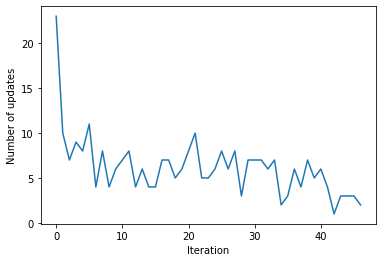

In [4]:
#Plot the number of updates you make in each iteration.
plt.plot(update)
plt.xlabel('Iteration')
plt.ylabel('Number of updates')
plt.show()

In [5]:
#Now, reduce the margin of the dataset by adding 10 points, whose features lie between between (-1,0) and (0,1). Labels are still generated as Yi=sign(W.Xi), i.e. the dataset is still linearly separable but now has narrower margin.
X1 = np.random.uniform(-1,0,(10,10))
X2 = np.random.uniform(0,1,(10,10))
X = np.concatenate((X,X1,X2),axis=0)
Y = np.sign(np.dot(X,W))
print(X.shape,Y.shape)

(120, 10) (120,)


W =  [-27.3223696    7.23664416 -24.37752734  85.9967009  -45.59017959
  27.62942668   5.91626868  56.05654912 -70.10252802  45.06223678]
b =  7.0


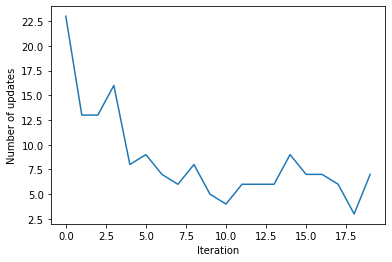

In [6]:
#Run the perceptron algorithm again and plot the number of updates in each iteration
W,b,update = perceptron(X,Y)
print("W = ", W)
print("b = ", b)
plt.plot(update)
plt.xlabel('Iteration')
plt.ylabel('Number of updates')
plt.show()

In [7]:
#Now add 5 “outliers” on both sides of W
X1 = np.random.uniform(-10,-1,(5,10))
X2 = np.random.uniform(1,10,(5,10))
X = np.concatenate((X,X1,X2),axis=0)
Y = np.sign(np.dot(X,W))
print(X.shape,Y.shape)

(130, 10) (130,)


W =  [-44.17219971  -0.61803069 -27.50850151 116.25704535 -54.74737012
  42.04573027   6.18933969  76.33181496 -89.54285526  61.05194955]
b =  12.0


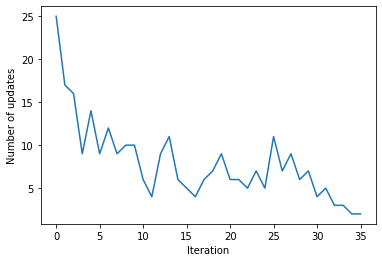

In [8]:
#Run the perceptron and plot the number of updates in each iteration.
W,b,update = perceptron(X,Y)
print("W = ", W)
print("b = ", b)
plt.plot(update)
plt.xlabel('Iteration')
plt.ylabel('Number of updates')
plt.show()